In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [4]:
df1 = pd.read_csv(r'tmdb_5000_credits.csv')


In [5]:
df2 = pd.read_csv(r'tmdb_5000_movies.csv')

In [6]:
df1.columns = ['id', 'title', 'cast', 'crew']
df2 = df2.merge(df1, on='id')


In [7]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
c = df2['vote_average'].mean()
c

6.092171559442016

In [9]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [10]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [11]:
def weighted_rating(x, m=m, c=c):
  v = x['vote_count']
  R = x['vote_average']

  return (v/(v+m) * R) + (m/(m+v) * c)


#### Defining a new feature 'score' and calculate its value with weighted_rating()

In [12]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


#### Sort movies based on score calculated above

In [13]:
print(q_movies)

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4291    1200000  [{"id": 27, "name": "Horror"}, {"id": 9648, "n...   
4300    1200000  [{"id": 80, "name": "Crime"}, {"id": 53, "name...   
4302    1200000                    [{"id": 37, "name": "Western"}]   
4337    1300000  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
4602     350000                      [{"id": 18, "name": "Drama"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.

In [14]:
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title_x', 'vote_count', 'vote_average', 'score']].head(10)


,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

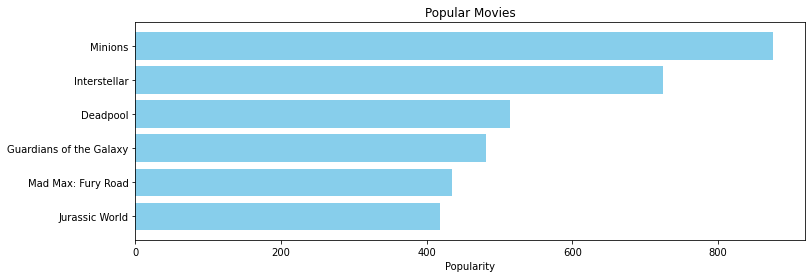

In [15]:
pop = df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.barh(pop['title_x'].head(6), pop['popularity'].head(6), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


In [16]:
df2['overview'].head(5)


0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

#### Import TfIdVectorizer from scikit learn

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Replace Nan with an empty string
df2['overview'] = df2['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting  and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

#### Import linear_kernel

In [18]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [19]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title_x']).drop_duplicates()


In [20]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations(title_x, cosine_sim=cosine_sim):
  idx = indices[title_x]

  sim_scores = list(enumerate(cosine_sim[idx]))

  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  sim_scores = sim_scores[1:11]

  movie_indices = [i[0] for i in sim_scores]

  return df2['title_x'].iloc[movie_indices]


In [21]:
get_recommendations('The Dark Knight')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: title_x, dtype: object

In [22]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

In [24]:
print(features)


NameError: ignored

In [25]:
# Parse the stringified features into their corresponding python objects

from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
  df2[feature] = df2[feature].apply(literal_eval)


In [26]:
def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
  return np.nan
  

In [27]:
print(cast)

NameError: ignored

In [28]:
# Return the list top 3 elements or entire list; whichever is more

def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]

    if len(names) > 3:
      names = names[:3]
    return names

  return []
  

In [29]:
# Define new director, cast, genres and keywords and features that are in a suitable form

df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
  df2[feature] = df2[feature].apply(get_list)
  

In [30]:
# Print the new features of the first 3 films
df2[['title_x', 'cast', 'keywords', 'genres']].head(3)

,title_x,cast,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [31]:
def clean_data(x):
  if isinstance(x, list):
    return [str.lower (i.replace(" ", " ")) for i in x]
  else:
    if isinstance(x, str):
      return str.lower(x.replace(" ", " "))
    else:
      return ''

In [32]:
# Apply clean_data functions to your features
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
  df2[feature] = df2[feature].apply(clean_data)
  

In [33]:
def create_soup(x):
  return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' ' .join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [35]:
# Compute the cosine similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [36]:
# Reset index of our main DataFrame and construct reverse mapping as before

df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title_x'])


In [37]:
get_recommendations('The Dark Knight Rises', cosine_sim2)


119                 Batman Begins
1196                 The Prestige
65                The Dark Knight
280                Public Enemies
4638     Amidst the Devil's Wings
224                       RoboCop
358     Atlantis: The Lost Empire
3073            Romeo Is Bleeding
1149              American Hustle
3332                  Harry Brown
Name: title_x, dtype: object

In [38]:
get_recommendations('The Godfather', cosine_sim2)


867     The Godfather: Part III
2731     The Godfather: Part II
1525             Apocalypse Now
4124         This Thing of Ours
2792        Glengarry Glen Ross
1209              The Rainmaker
3012              The Outsiders
4209           The Conversation
1018            The Cotton Club
2600           New York Stories
Name: title_x, dtype: object

In [39]:
from google.colab import files
uploaded = files.upload()

Saving ratings_small.csv to ratings_small.csv


In [40]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 6.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633989 sha256=b018b41989d87fcb97e587a3540a7645049546ebfb4cc50495a44f7edfcc83a2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [41]:
pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 511 kB/s 
     |████████████████████████████████| 441 kB 33.7 MB/s 
     |████████████████████████████████| 163 kB 16.6 MB/s 
     |████████████████████████████████| 115 kB 62.3 MB/s 
     |████████████████████████████████| 212 kB 58.4 MB/s 
     |████████████████████████████████| 95 kB 4.9 MB/s 
     |████████████████████████████████| 127 kB 10.9 MB/s 
     |████████████████████████████████| 115 kB 52.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [43]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the dataset (download it if needed)
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm
algo = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9383  0.9419  0.9405  0.9222  0.9447  0.9375  0.0079  
MAE (testset)     0.7373  0.7437  0.7449  0.7294  0.7424  0.7395  0.0057  
Fit time          4.20    4.12    4.14    4.13    4.18    4.15    0.03    
Test time         0.14    0.29    0.14    0.16    0.23    0.19    0.06    


{'test_rmse': array([0.93829604, 0.94189254, 0.94049538, 0.92224334, 0.94466221]),
 'test_mae': array([0.7372941 , 0.7436549 , 0.7448661 , 0.72937183, 0.74244481]),
 'fit_time': (4.199165344238281,
  4.122366428375244,
  4.13630223274231,
  4.131227731704712,
  4.184828281402588),
 'test_time': (0.14165329933166504,
  0.2917149066925049,
  0.13532328605651855,
  0.16470837593078613,
  0.22673964500427246)}

In [45]:
pip install scikit-surprise==1.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from surprise import Reader, Dataset, SVD
reader = Reader()
ratings = pd.read_csv(r'ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [51]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)


AttributeError: ignored

In [52]:
svd = SVD()
evaluate(svd, data, measure=['RMSE', 'MAE'])

NameError: ignored

In [53]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [54]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [55]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6825722397821865, details={'was_impossible': False})